In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.under_sampling import AllKNN
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn import preprocessing
%matplotlib inline
import itertools
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.metrics import matthews_corrcoef


In [2]:
df_train = pd.read_csv("creditcard.csv")

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df_train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df_train.corr().round(2)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.00,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.08,-0.04,-0.01,...,0.04,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01,-0.01
V1,0.12,1.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,...,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.23,-0.10
V2,-0.01,0.00,1.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,...,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.53,0.09
V3,-0.42,-0.00,0.00,1.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,...,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.21,-0.19
V4,-0.11,0.00,-0.00,-0.00,1.00,-0.00,-0.00,0.00,0.00,0.00,...,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.10,0.13
V5,0.17,0.00,-0.00,-0.00,-0.00,1.00,0.00,-0.00,0.00,0.00,...,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.39,-0.09
V6,-0.06,0.00,0.00,0.00,-0.00,0.00,1.00,0.00,-0.00,0.00,...,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.22,-0.04
V7,0.08,0.00,0.00,0.00,0.00,-0.00,0.00,1.00,-0.00,0.00,...,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.40,-0.19
V8,-0.04,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,1.00,0.00,...,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.10,0.02
V9,-0.01,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.04,-0.10


In [7]:
df_train.shape

(284807, 31)

In [8]:
df_train["Class"].unique()

array([0, 1], dtype=int64)

In [9]:
df_train["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# Highly imbalanced dataset with 99.8% belonging to class 0 

In [10]:
train_data, test_data = train_test_split(df_train,
                                   test_size=0.20,
                                   random_state=16)

print('No interactions on Train set: %d' % len(train_data))
print('No interactions on Test set: %d' % len(test_data))

No interactions on Train set: 227845
No interactions on Test set: 56962


In [11]:
train_data_Y = train_data["Class"]
train_data_X = train_data.drop(["Class"], axis=1)

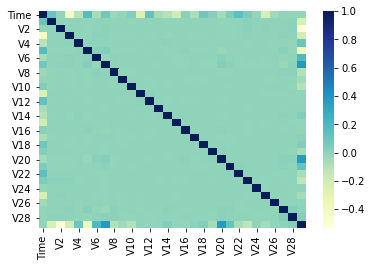

In [12]:
sns.heatmap(train_data_X.corr(), cmap="YlGnBu") 

In [13]:
print(len(train_data_X))
print(len(train_data_Y))


227845
227845


In [14]:
test_data_Y = test_data["Class"]
test_data_X = test_data.drop(["Class"], axis=1)

In [15]:
train_data_X,train_data_Y = SMOTE().fit_resample(train_data_X,train_data_Y)

# Case 1 - LOGISTIC REGRESSION USING SMOTE


In [16]:
lr = LogisticRegression()

In [17]:
lr.fit(train_data_X,train_data_Y)

LogisticRegression()

In [18]:
predictions = lr.predict(test_data_X)

In [19]:
print("Accuracy - " + str(accuracy_score(test_data_Y,predictions)))
print("Recall - " + str(recall_score(test_data_Y,predictions)))
print("precision - " + str(precision_score(test_data_Y,predictions)))
print("f1_score - " + str(f1_score(test_data_Y,predictions)))
print("mcc - " + str(matthews_corrcoef(test_data_Y,predictions)))

Accuracy - 0.9773884343948598
Recall - 0.9690721649484536
precision - 0.0681653372008702
f1_score - 0.12737127371273713
mcc - 0.2539009422626266


In [20]:
accuracy1 = accuracy_score(test_data_Y,predictions)
recall1 = recall_score(test_data_Y,predictions)
precision1 = precision_score(test_data_Y,predictions)
f1score1 = f1_score(test_data_Y,predictions)
mcc1 = matthews_corrcoef(test_data_Y,predictions)

In [21]:
roc1 = roc_auc_score(test_data_Y, predictions)
print(roc1)

0.9732373925946877


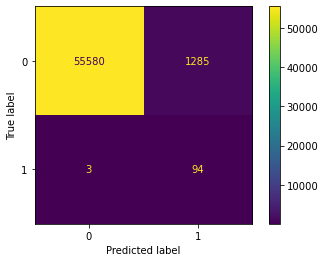

In [22]:
plot_confusion_matrix(lr,test_data_X,test_data_Y)

# Case 2 - LOGISTIC REGRESSION WITH MINMAXSCALER

In [23]:
min_max = preprocessing.MinMaxScaler()
scale_train_data_X = min_max.fit_transform(train_data_X)


In [24]:
train_data_Y2 = train_data_Y
train_data_X2 = scale_train_data_X

In [25]:
lr = LogisticRegression()
lr.fit(train_data_X2,train_data_Y2)
predictions = lr.predict(test_data_X)


c:\users\jainy\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [26]:
print("Accuracy - " + str(accuracy_score(test_data_Y,predictions)))
print("Recall - " + str(recall_score(test_data_Y,predictions)))
print("precision - " + str(precision_score(test_data_Y,predictions)))
print("f1_score - " + str(f1_score(test_data_Y,predictions)))
print("mcc - " + str(matthews_corrcoef(test_data_Y,predictions)))

Accuracy - 0.9847617710052315
Recall - 0.0
precision - 0.0
f1_score - 0.0
mcc - -0.0048379029708381874


In [27]:
accuracy2 = accuracy_score(test_data_Y,predictions)
recall2 = recall_score(test_data_Y,predictions)
precision2 = precision_score(test_data_Y,predictions)
f1score2 = f1_score(test_data_Y,predictions)
mcc2 = matthews_corrcoef(test_data_Y,predictions)

In [28]:
roc2 = roc_auc_score(test_data_Y, predictions)
print(roc2)

0.49322078607227643


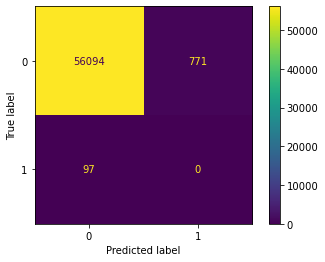

In [29]:
plot_confusion_matrix(lr,test_data_X,test_data_Y)


# Case 3 WITH DECISION TREE


In [30]:
clf3 = tree.DecisionTreeClassifier()
clf3 = clf3.fit(train_data_X,train_data_Y)

In [31]:
predictions = clf3.predict(test_data_X)

In [32]:
print("Accuracy - " + str(accuracy_score(test_data_Y,predictions)))
print("Recall - " + str(recall_score(test_data_Y,predictions)))
print("precision - " + str(precision_score(test_data_Y,predictions)))
print("f1_score - " + str(f1_score(test_data_Y,predictions)))
print("mcc - " + str(matthews_corrcoef(test_data_Y,predictions)))

Accuracy - 0.9981742214107651
Recall - 0.8762886597938144
precision - 0.480225988700565
f1_score - 0.6204379562043796
mcc - 0.6479620420198642


In [33]:
accuracy3 = accuracy_score(test_data_Y,predictions)
recall3 = recall_score(test_data_Y,predictions)
precision3 = precision_score(test_data_Y,predictions)
f1score3 = f1_score(test_data_Y,predictions)
mcc3 = matthews_corrcoef(test_data_Y,predictions)

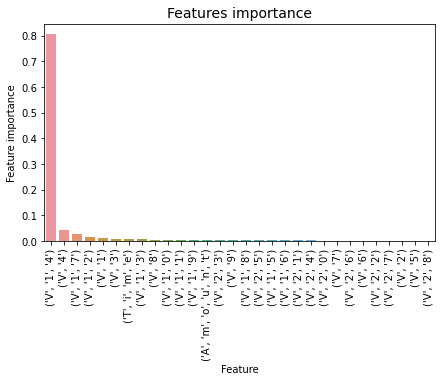

In [34]:
tmp = pd.DataFrame({'Feature': test_data_X, 'Feature importance': clf3.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   


In [35]:
roc3 = roc_auc_score(test_data_Y, predictions)
print(roc3)

0.9373353964580607


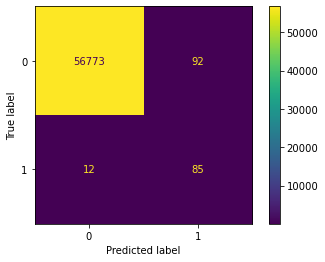

In [36]:
plot_confusion_matrix(clf3,test_data_X,test_data_Y)

# Case 5 Random Forest

In [37]:
clf5 = RandomForestClassifier()

In [38]:
clf5.fit(train_data_X,train_data_Y)

RandomForestClassifier()

In [39]:
predictions = clf5.predict(test_data_X)

In [40]:
print("Accuracy - " + str(accuracy_score(test_data_Y,predictions)))
print("Recall - " + str(recall_score(test_data_Y,predictions)))
print("precision - " + str(precision_score(test_data_Y,predictions)))
print("f1_score - " + str(f1_score(test_data_Y,predictions)))
print("mcc - " + str(matthews_corrcoef(test_data_Y,predictions)))

Accuracy - 0.9995962220427653
Recall - 0.8762886597938144
precision - 0.8854166666666666
f1_score - 0.8808290155440415
mcc - 0.8806386506041662


In [41]:
accuracy5 = accuracy_score(test_data_Y,predictions)
recall5 = recall_score(test_data_Y,predictions)
precision5 = precision_score(test_data_Y,predictions)
f1score5 = f1_score(test_data_Y,predictions)
mcc5 = matthews_corrcoef(test_data_Y,predictions)

In [42]:
roc5 = roc_auc_score(test_data_Y, predictions)
print(roc5)

0.9380476095944364


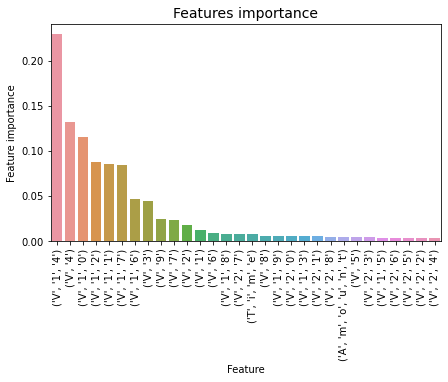

In [43]:
tmp = pd.DataFrame({'Feature': test_data_X, 'Feature importance': clf5.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   


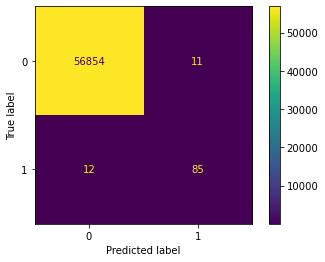

In [44]:
plot_confusion_matrix(clf5,test_data_X,test_data_Y)

# Case 10 Adaboost with Smote

In [45]:
clf10 = AdaBoostClassifier()

In [46]:
clf10.fit(train_data_X,train_data_Y)
predictions = clf10.predict(test_data_X)


In [47]:
print("Accuracy - " + str(accuracy_score(test_data_Y,predictions)))
print("Recall - " + str(recall_score(test_data_Y,predictions)))
print("precision - " + str(precision_score(test_data_Y,predictions)))
print("f1_score - " + str(f1_score(test_data_Y,predictions)))
print("mcc - " + str(matthews_corrcoef(test_data_Y,predictions)))

Accuracy - 0.9858677714967873
Recall - 0.9484536082474226
precision - 0.1031390134529148
f1_score - 0.18604651162790697
mcc - 0.3103034719114216


In [48]:
accuracy10 = accuracy_score(test_data_Y,predictions)
recall10 = recall_score(test_data_Y,predictions)
precision10 = precision_score(test_data_Y,predictions)
f1score10 = f1_score(test_data_Y,predictions)
mcc10 = matthews_corrcoef(test_data_Y,predictions)

In [49]:
roc10 = roc_auc_score(test_data_Y, predictions)
print(roc10)

0.9671926003076557


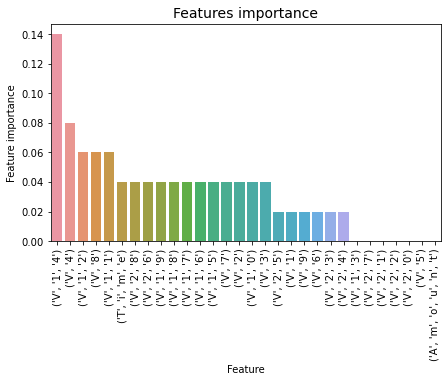

In [50]:
tmp = pd.DataFrame({'Feature': test_data_X, 'Feature importance': clf10.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   


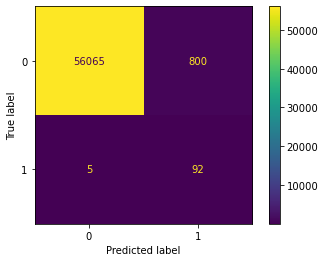

In [51]:
plot_confusion_matrix(clf10,test_data_X,test_data_Y)

# Case 11 Cat-boost-classifier

In [52]:
clf11 = CatBoostClassifier(iterations=500,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = 32,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=100)

In [53]:
clf11.fit(train_data_X,train_data_Y)

0:	total: 1.44s	remaining: 11m 56s
50:	total: 1m 5s	remaining: 9m 38s
100:	total: 2m 11s	remaining: 8m 38s
150:	total: 3m 14s	remaining: 7m 29s
200:	total: 4m 18s	remaining: 6m 23s
250:	total: 5m 27s	remaining: 5m 24s
300:	total: 6m 28s	remaining: 4m 17s
350:	total: 7m 27s	remaining: 3m 10s
400:	total: 8m 29s	remaining: 2m 5s
450:	total: 9m 33s	remaining: 1m 2s
499:	total: 10m 30s	remaining: 0us


In [54]:
predictions = clf11.predict(test_data_X)

In [55]:
print("Accuracy - " + str(accuracy_score(test_data_Y,predictions)))
print("Recall - " + str(recall_score(test_data_Y,predictions)))
print("precision - " + str(precision_score(test_data_Y,predictions)))
print("f1_score - " + str(f1_score(test_data_Y,predictions)))
print("mcc - " + str(matthews_corrcoef(test_data_Y,predictions)))

Accuracy - 0.9994382219725431
Recall - 0.9072164948453608
precision - 0.7927927927927928
f1_score - 0.8461538461538461
mcc - 0.8478033287318534


In [56]:
accuracy11 = accuracy_score(test_data_Y,predictions)
recall11 = recall_score(test_data_Y,predictions)
precision11 = precision_score(test_data_Y,predictions)
f1score11 = f1_score(test_data_Y,predictions)
mcc11 = matthews_corrcoef(test_data_Y,predictions)

In [57]:
roc11 = roc_auc_score(test_data_Y, predictions)
print(roc11)

0.9534060140629688


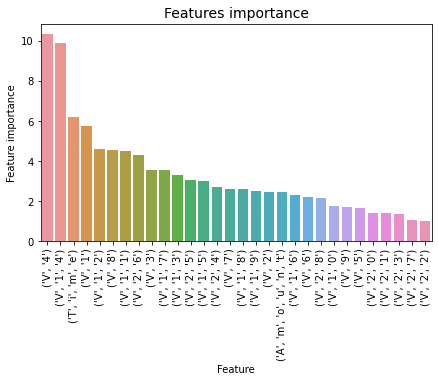

In [58]:
tmp = pd.DataFrame({'Feature': test_data_X, 'Feature importance': clf11.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

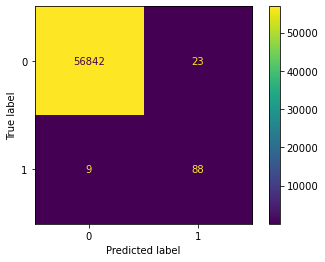

In [59]:
plot_confusion_matrix(clf11,test_data_X,test_data_Y)

# Case12 XGB-classifier

In [60]:
clf12 = XGBClassifier()
clf12.fit(train_data_X, train_data_Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [61]:
y_pred = clf12.predict(test_data_X)
predictions = [round(value) for value in y_pred]

In [62]:
print("Accuracy - " + str(accuracy_score(test_data_Y,predictions)))
print("Recall - " + str(recall_score(test_data_Y,predictions)))
print("precision - " + str(precision_score(test_data_Y,predictions)))
print("f1_score - " + str(f1_score(test_data_Y,predictions)))
print("mcc - " + str(matthews_corrcoef(test_data_Y,predictions)))

Accuracy - 0.9995611109160493
Recall - 0.8865979381443299
precision - 0.86
f1_score - 0.8730964467005077
mcc - 0.8729782539137878


In [63]:
accuracy12 = accuracy_score(test_data_Y,predictions)
recall12 = recall_score(test_data_Y,predictions)
precision12 = precision_score(test_data_Y,predictions)
f1score12 = f1_score(test_data_Y,predictions)
mcc12 = matthews_corrcoef(test_data_Y,predictions)

In [64]:
roc12 = roc_auc_score(test_data_Y, predictions)
print(roc12)

0.943175870505384


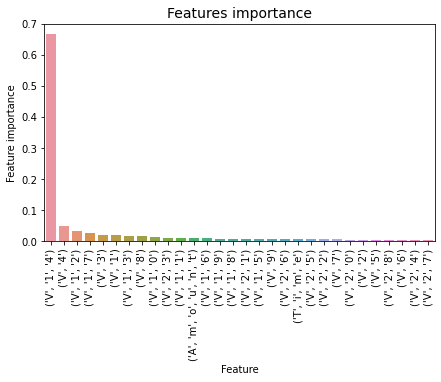

In [65]:
tmp = pd.DataFrame({'Feature': test_data_X, 'Feature importance': clf12.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

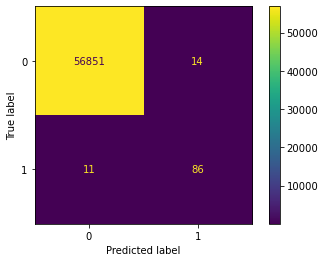

In [66]:
plot_confusion_matrix(clf12,test_data_X,test_data_Y)

# Case 13 Lightgbm

In [67]:
clf13 = LGBMClassifier()
clf13.fit(train_data_X, train_data_Y)

LGBMClassifier()

In [68]:
predictions = clf13.predict(test_data_X)

In [69]:
print("Accuracy - " + str(accuracy_score(test_data_Y,predictions)))
print("Recall - " + str(recall_score(test_data_Y,predictions)))
print("precision - " + str(precision_score(test_data_Y,predictions)))
print("f1_score - " + str(f1_score(test_data_Y,predictions)))
print("mcc - " + str(matthews_corrcoef(test_data_Y,predictions)))

Accuracy - 0.9990168884519505
Recall - 0.9278350515463918
precision - 0.6474820143884892
f1_score - 0.7627118644067796
mcc - 0.7746511382584088


In [70]:
accuracy13 = accuracy_score(test_data_Y,predictions)
recall13 = recall_score(test_data_Y,predictions)
precision13 = precision_score(test_data_Y,predictions)
f1score13 = f1_score(test_data_Y,predictions)
mcc13 = matthews_corrcoef(test_data_Y,predictions)

In [71]:
roc13 = roc_auc_score(test_data_Y, predictions)
print(roc13)

0.9634866807894625


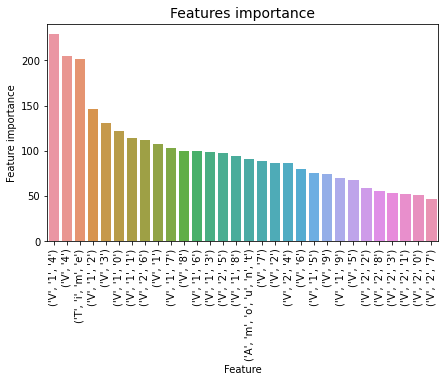

In [72]:
tmp = pd.DataFrame({'Feature': test_data_X, 'Feature importance': clf13.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

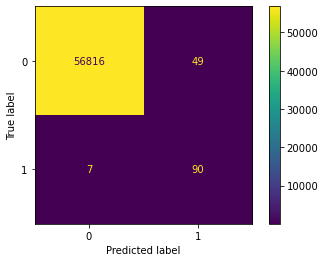

In [73]:
plot_confusion_matrix(clf13,test_data_X,test_data_Y)

# Plot for different ROC_AUC score

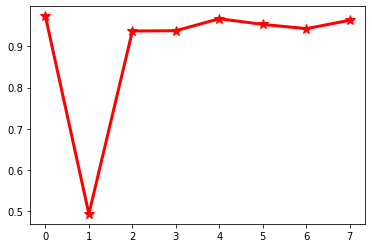

In [74]:
list_of_roc = [roc1,roc2,roc3,roc5,roc10,roc11,roc12,roc13]
plt.plot(list_of_roc, color='r', linestyle='solid', marker='*', linewidth=3, markersize=10)

# Plot for accuracy

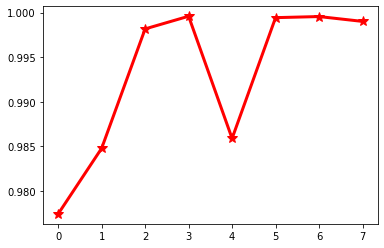

In [75]:
list_of_accuracy = [accuracy1,accuracy2,accuracy3,accuracy5,accuracy10,accuracy11,accuracy12,accuracy13]
plt.plot(list_of_accuracy, color='r', linestyle='solid', marker='*', linewidth=3, markersize=10)

# Plot for recall

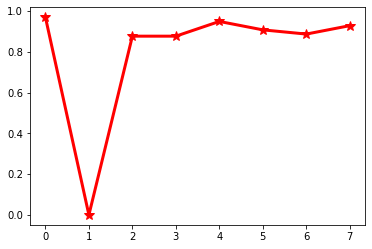

In [76]:
list_of_recall = [recall1,recall2,recall3,recall5,recall10,recall11,recall12,recall13]
plt.plot(list_of_recall, color='r', linestyle='solid', marker='*', linewidth=3, markersize=10)

# Plot for precision

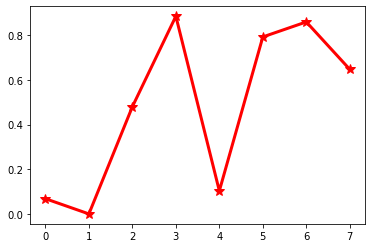

In [77]:
list_of_precision = [precision1,precision2,precision3,precision5,precision10,precision11,precision12,precision13]
plt.plot(list_of_precision, color='r', linestyle='solid', marker='*', linewidth=3, markersize=10)

# Plot for f1score

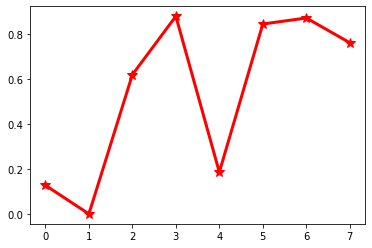

In [78]:
list_of_f1score = [f1score1,f1score2,f1score3,f1score5,f1score10,f1score11,f1score12,f1score13]
plt.plot(list_of_f1score, color='r', linestyle='solid', marker='*', linewidth=3, markersize=10)

# Plot for MCC

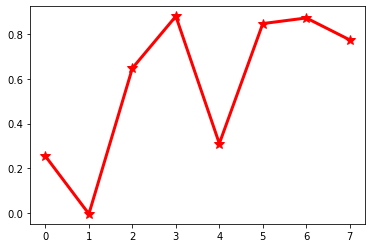

In [79]:
list_of_mcc = [mcc1,mcc2,mcc3,mcc5,mcc10,mcc11,mcc12,mcc13]
plt.plot(list_of_mcc, color='r', linestyle='solid', marker='*', linewidth=3, markersize=10)

# Case 14 using neural networks

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
# define the model
model = Sequential()
model.add(Dense(512, input_shape=(30,)))
x = tf.keras.layers.Dropout(rate=0.2)
model.add(x)
model.add(Dense(256))
x = tf.keras.layers.Dropout(rate=0.2)
model.add(x)
model.add(Dense(128))
x = tf.keras.layers.Dropout(rate=0.2)
model.add(x)
model.add(Dense(64))
x = tf.keras.layers.Dropout(rate=0.2)
model.add(x)
model.add(Dense(32))
x = tf.keras.layers.Dropout(rate=0.2)
model.add(x)
model.add(Dense(1, activation='sigmoid'))
          


In [ ]:
model.summary()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
x1 = model.fit(train_data_X_7, train_data_Y_7,epochs=50,batch_size=32)

In [ ]:
predictions = model.predict_classes(test_data_X)
print(predictions)

In [ ]:
print("Accuracy - " + str(accuracy_score(test_data_Y,predictions)))
print("Recall - " + str(recall_score(test_data_Y,predictions)))
print("precision - " + str(precision_score(test_data_Y,predictions)))
print("f1_score - " + str(f1_score(test_data_Y,predictions)))